<center><u><H1>SQLite con Pandas</H1></u></center>

## Instructions:
- You can install DB Browser for SQLite: https://sqlitebrowser.org/

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns

In [2]:
conn = sqlite3.connect('../data\soccer.sqlite')
cursor = conn.cursor()
print('Conexion exitosa!')
conn.close()

Conexion exitosa!


## Read Table

In [3]:
conn = sqlite3.connect('../data\soccer.sqlite')

In [4]:
player_table = pd.read_sql_query("select * from Player", conn)
player_table.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [5]:
league_table = pd.read_sql_query('select * from League', conn)
league_table.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


## Data Analysis

In [6]:
player_table.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [7]:
## Players with height > 180 cm
player_180 = pd.read_sql_query("select * from Player where height >=185", conn)
player_180.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
1,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168
2,18,23499,Aaron Wilbraham,2335,1979-10-21 00:00:00,190.50,159
3,20,46447,Abasse Ba,156626,1976-07-12 00:00:00,187.96,185
4,22,245653,Abdelfettah Boukhriss,202425,1986-10-22 00:00:00,185.42,161


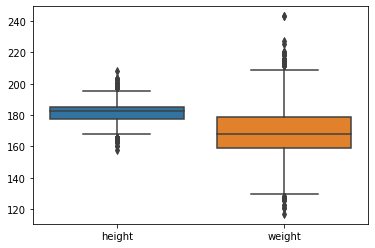

In [8]:
sns.boxplot(data=player_table.loc[:,["height","weight"]])

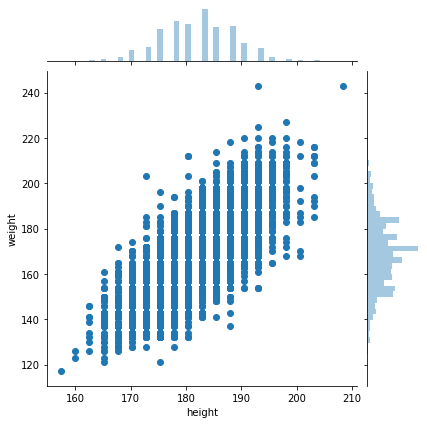

In [9]:
sns.jointplot(x='height', y='weight', data=player_table, kind='scatter')

## Reference:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html